## Forecasting energy demands using univariate time series analysis

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing 
from sklearn.metrics import r2_score

## Loading the Data
Data Source Kaggle: https://www.kaggle.com/robikscube/hourly-energy-consumption

In [ ]:
df = pd.read_csv('/content/DOM_hourly.csv')

In [ ]:
df

,Datetime,DOM_MW
0,2005-12-31 01:00:00,9389.0
1,2005-12-31 02:00:00,9070.0
2,2005-12-31 03:00:00,9001.0
3,2005-12-31 04:00:00,9042.0
4,2005-12-31 05:00:00,9132.0
...,...,...
116184,2018-01-01 20:00:00,18418.0
116185,2018-01-01 21:00:00,18567.0
116186,2018-01-01 22:00:00,18307.0
116187,2018-01-01 23:00:00,17814.0


## Generating Daily Data


In [ ]:
# uncomment the folllowing line for generating daily data
# df = df[df['Datetime'].str.contains.("00:00:00")]

In [ ]:
df['Datetime'] = pd.to_datetime(df.Datetime, format = '%Y-%m-%d %H:%M:%S')
df.index = df.Datetime
df.drop(['Datetime'], axis=1, inplace=True)

In [ ]:
df.head()

,DOM_MW
Datetime,
2005-12-31 01:00:00,9389.0
2005-12-31 02:00:00,9070.0
2005-12-31 03:00:00,9001.0
2005-12-31 04:00:00,9042.0
2005-12-31 05:00:00,9132.0


In [ ]:
df

,DOM_MW
Datetime,
2005-12-31 01:00:00,9389.0
2005-12-31 02:00:00,9070.0
2005-12-31 03:00:00,9001.0
2005-12-31 04:00:00,9042.0
2005-12-31 05:00:00,9132.0
...,...
2018-01-01 20:00:00,18418.0
2018-01-01 21:00:00,18567.0
2018-01-01 22:00:00,18307.0


In [ ]:
# Checking the Missing Data
df.isna().sum()

DOM_MW    0
dtype: int64

## Examine Data in Trend

In [ ]:
#@title Date Range
a = '2005-12-31'#@param {type:"date"}
b = '2018-01-31'#@param {type:"date"}


a = a + " 00:00:00"
b = b + " 00:00:00"
print(a)
print(b)

2005-12-31 00:00:00
2018-01-31 00:00:00


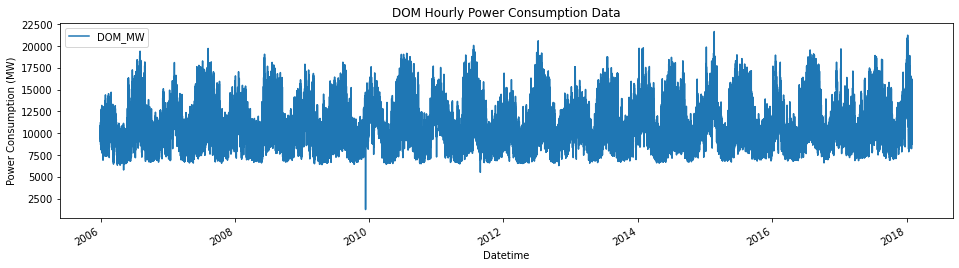

In [ ]:
df.loc[a:b].plot(figsize=(16,4), legend=True)

plt.title("DOM Hourly Power Consumption Data")
plt.ylabel('Power Consumption (MW)')

plt.show()

## Normalize the Data

Before proceeding with further data analysis we must ensure that data is normalized.

For this, we will be using SKLearn MinMaxScaler

In [ ]:
df.shape

(116189, 1)

In [ ]:
scaler = sklearn.preprocessing.MinMaxScaler()
df['DOM_MW'] = scaler.fit_transform(df['DOM_MW'].values.reshape(-1, 1))

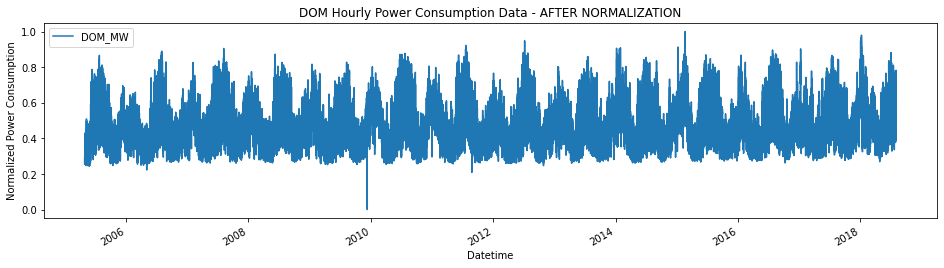

In [ ]:
df.plot(figsize=(16, 4), legend=True)
plt.title('DOM Hourly Power Consumption Data - AFTER NORMALIZATION')
plt.ylabel('Normalized Power Consumption')
plt.show()

## Training and Testing

In [ ]:
def load_data(stock, seqlen):
  X_train = []
  y_train = []

  for i in range(seq_len, len(stock)):
    X_train.append([stock.iloc[i-seq_len: i, 0]])
    y_train.append(stock.iloc[i, 0])

  X_test = X_train[int(0.9*(len(stock))):]
  y_test = y_train[int(0.9*(len(stock))):]

  X_train = X_train[:int(0.9*(len(stock)))]
  y_train = y_train[:int(0.9*(len(stock)))]

  # convert to numpy array 
  X_train = np.array(X_train)
  y_train = np.array(y_train)

  X_test = np.array(X_test)
  y_test = np.array(y_test)

  # reshape data to input into RNN models
  X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
  X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))


  return [X_train, y_train, X_test, y_test]




In [7]:
def load_data1(stock, seq_len):
  
  for i in range(seq_len, stock):
    print(i-seq_len)
    print(i)
    print(seq_len)

In [8]:
load_data1(100, 20)

0
20
20
1
21
20
2
22
20
3
23
20
4
24
20
5
25
20
6
26
20
7
27
20
8
28
20
9
29
20
10
30
20
11
31
20
12
32
20
13
33
20
14
34
20
15
35
20
16
36
20
17
37
20
18
38
20
19
39
20
20
40
20
21
41
20
22
42
20
23
43
20
24
44
20
25
45
20
26
46
20
27
47
20
28
48
20
29
49
20
30
50
20
31
51
20
32
52
20
33
53
20
34
54
20
35
55
20
36
56
20
37
57
20
38
58
20
39
59
20
40
60
20
41
61
20
42
62
20
43
63
20
44
64
20
45
65
20
46
66
20
47
67
20
48
68
20
49
69
20
50
70
20
51
71
20
52
72
20
53
73
20
54
74
20
55
75
20
56
76
20
57
77
20
58
78
20
59
79
20
60
80
20
61
81
20
62
82
20
63
83
20
64
84
20
65
85
20
66
86
20
67
87
20
68
88
20
69
89
20
70
90
20
71
91
20
72
92
20
73
93
20
74
94
20
75
95
20
76
96
20
77
97
20
78
98
20
79
99
20


In [6]:
df[]

-19

In [ ]:
# create train, test data
seq_len = 20 #choose sequence length

X_train, y_train, X_test, y_test = load_data(df, seq_len)

print('X_train.shape', X_train.shape)
print('y_train.shape', y_train.shape)
print('X_test.shape', X_test.shape)
print('y_test.shape', y_test.shape)

X_train.shape (104570, 20, 1)
y_train.shape (104570,)
X_test.shape (11599, 20, 1)
y_test.shape (11599,)


## Create Input Tensors

In [ ]:
batch_size = 256
buffer_size = 1000

train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_data = train_data.cache().shuffle(buffer_size).batch(batch_size).repeat()

test_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_data = test_data.batch(batch_size).repeat()

## Build Model

In [ ]:
rnn_model = tf.keras.models.Sequential([
                                        
            tf.keras.layers.LSTM(8, input_shape=X_train.shape[-2:]),
            tf.keras.layers.Dense(1)
])

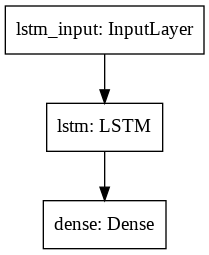

In [ ]:
tf.keras.utils.plot_model(rnn_model)

## Compiling and Training

In [ ]:
rnn_model.compile(optimizer='adam', loss='mae')

EVALUATION_INTERVAL = 200
EPOCHS = 10
rnn_model.fit(train_data, epochs=EPOCHS, steps_per_epoch=EVALUATION_INTERVAL, validation_data=test_data, validation_steps=50)

Epoch 1/10
200/200 [==============================] - 6s 16ms/step - loss: 0.0674 - val_loss: 0.0595
Epoch 2/10
200/200 [==============================] - 3s 13ms/step - loss: 0.0530 - val_loss: 0.0512
Epoch 3/10
200/200 [==============================] - 3s 13ms/step - loss: 0.0448 - val_loss: 0.0412
Epoch 4/10
200/200 [==============================] - 3s 13ms/step - loss: 0.0375 - val_loss: 0.0414
Epoch 5/10
200/200 [==============================] - 3s 13ms/step - loss: 0.0314 - val_loss: 0.0276
Epoch 6/10
200/200 [==============================] - 3s 13ms/step - loss: 0.0265 - val_loss: 0.0296
Epoch 7/10
200/200 [==============================] - 3s 13ms/step - loss: 0.0226 - val_loss: 0.0218
Epoch 8/10
200/200 [==============================] - 2s 12ms/step - loss: 0.0213 - val_loss: 0.0210
Epoch 9/10
200/200 [==============================] - 2s 11ms/step - loss: 0.0196 - val_loss: 0.0187
Epoch 10/10
200/200 [==============================] - 2s 10ms/step - loss: 0.0182 - val_lo

## Prediction

In [ ]:
rnn_predictions = rnn_model.predict(X_test)
rnn_score = r2_score(y_test, rnn_predictions)
print("R2 Score of RNN model = " + "{:.4f}" .format(rnn_score));

R2 Score of RNN model = 0.9580


## Plot of Actual V/S Predicted Values

We see that the predicted values are close to the actual values meaning the RNN model is performing well in predicting the sequence

In [ ]:
#@title Data Range
a = 0 #@param {type:"slider", min:0, max:12000, step:1}
b = 12000 #@param {type: "slider", min:0, max:12000, step:1}

def plot_predictions(test, predicted, title):
  plt.figure(figsize=(16, 4))
  plt.plot(test[a:b], color='blue', label="Normalized Power Consumption")
  plt.plot(predicted[a:b], alpha=0.7, color='orange', label="Predicted Power Consumption")
  plt.title(title)
  plt.xlabel('Time')
  plt.ylabel('Normalized Power Consumption')
  plt.legend()
  plt.show()

  

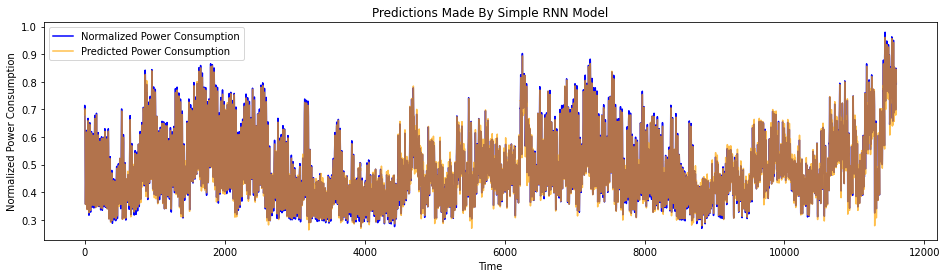

In [ ]:
plot_predictions(y_test, rnn_predictions, "Predictions Made By Simple RNN Model")

## Zooming in Mid Range

In [ ]:
#@title Data Range
a= 3069 #@param {type:"slider", min:0, max:12000, step:1}
b = 3097 #@param {type:"slider", min:0, max:12000, step:1}

def plot_predictions(test, predicted, title):
  plt.figure(figsize=(16, 4))
  plt.plot(test[a:b], color='blue', label="Normalized Power Consumption")
  plt.plot(predicted[a:b], alpha=0.7, color='orange', label="Predicted Power Consumption")
  plt.title(plt)
  plt.xlabel("Time")
  plt.ylabel("Normalized Power Consumption")
  plt.legend()
  plt.show()


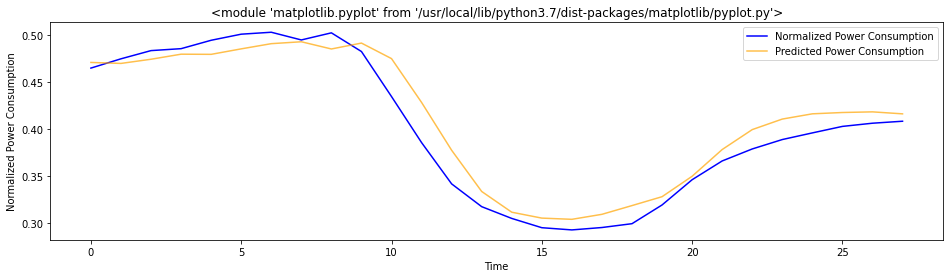

In [ ]:
plot_predictions(y_test, rnn_predictions, "Predictions Made By Simple RNN Model")

## Zooming in Towards the End

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


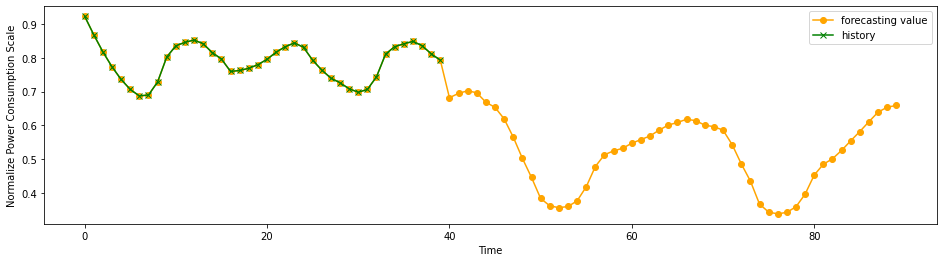

In [ ]:
history_data = list(y_test[-40:])
plottingvalues = list(history_data)+list(rnn_predictions[:50])
plt.figure(figsize=(16, 4))
plt.plot(plottingvalues, color='orange', label='forecasting value', marker='o')
plt.plot(y_test[-40:], color='green', label='history', marker='x')
plt.xlabel('Time')
plt.ylabel('Normalize Power Consumption Scale')
plt.legend()
plt.show()

## Predicting Next Data Points

In [ ]:
X = X_test[-1:]

In [ ]:
rnn_predictions1 = rnn_model.predict(X)

In [ ]:
rnn_predictions1

array([[0.7999805]], dtype=float32)

In [ ]:
history_data = list(y_test[-40:])

In [ ]:
plottingvalues = list(history_data)+list(rnn_predictions1)

In [ ]:
plottingvalues

[0.923374840670654,
 0.8684184723992548,
 0.8176782037454653,
 0.7733601333464065,
 0.7358074321011864,
 0.7062457103637612,
 0.6869791155995686,
 0.6897735072065889,
 0.728502794391607,
 0.8024806353564075,
 0.835817236984018,
 0.8459162663006177,
 0.8529267575252476,
 0.8415530934405334,
 0.8153740562800275,
 0.7964506324149426,
 0.7596332973820963,
 0.7624767134032748,
 0.7689969604863222,
 0.7797823316011374,
 0.7956662417884106,
 0.8169428375330915,
 0.8329738209628395,
 0.8443474850475536,
 0.8312089420531424,
 0.7928718501813903,
 0.7637023237572311,
 0.739827434062163,
 0.725953524855378,
 0.7082557113442495,
 0.6979115599568585,
 0.7061966859496029,
 0.7436023139523482,
 0.8112560054907344,
 0.8332189430336308,
 0.8415040690263751,
 0.8488087067359545,
 0.8360623590548093,
 0.8118933228747917,
 0.7929698990097068,
 array([0.7999805], dtype=float32)]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


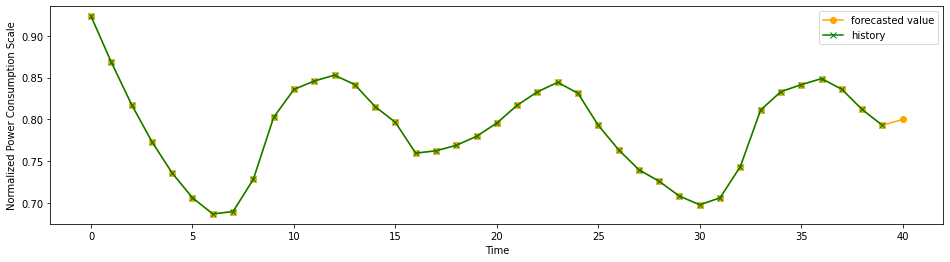

In [ ]:
plt.figure(figsize=(16, 4))
plt.plot(plottingvalues, color='orange', label='forecasted value', marker='o')
plt.plot(y_test[-40:], color='green', label='history', marker='x')
plt.xlabel('Time')
plt.ylabel('Normalized Power Consumption Scale')
plt.legend()
plt.show()

## Predictions For the  Range of Dates

In [ ]:
history_data = list(y_test[-40:])

In [ ]:
def make_data(X, rnn_predictions1):
  val = list(X[0][1:])+list(rnn_predictions1)
  X_new = []
  X_new.append(list(val))
  X_new = np.array(X_new)
  return X_new

In [ ]:
forecast = list()

In [ ]:
X = X_test[-1:]

In [ ]:
for i in range(25):
  X = make_data(X, rnn_predictions1)
  rnn_predictions1 = rnn_model.predict(X)
  forecast = forecast + list(rnn_predictions1)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


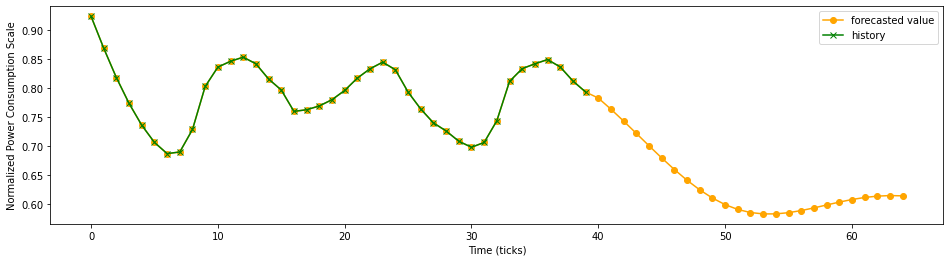

In [ ]:
plottingvalues = list(history_data)+list(forecast)
plt.figure(figsize=(16, 4))
plt.plot(plottingvalues, color='orange', label='forecasted value', marker='o')
plt.plot(y_test[-40:], color='green', label='history', marker='x')
plt.xlabel('Time (ticks)')
plt.ylabel('Normalized Power Consumption Scale')
plt.legend()
plt.show()